<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Jack_SVM_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

x_train = train_images.reshape(-1, 28 * 28) / 255.0
x_test = test_images.reshape(-1, 28 * 28) / 255.0
# Check the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [11]:
# Check if any GPU devices are available
if tf.config.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [12]:
# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

print(f"Flattened training data shape: {x_train.shape}")
print(f"Flattened test data shape: {x_test.shape}")

fashion_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                  4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
                  8: 'Bag', 9: 'Ankle boot'}



Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [13]:
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, train_labels, test_size=0.2, random_state=42)

In [15]:
svm_model = LinearSVC(max_iter=1000, tol=1e-3)  # More iterations and relaxed tolerance

num_epochs = 10
chunk_size = 5000

# Shuffle training data
x_train_split, y_train_split = shuffle(x_train_split, y_train_split)

# Train the model in chunks and print progress
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for i in range(0, len(x_train_split), chunk_size):
        end = min(i + chunk_size, len(x_train_split))
        svm_model.fit(x_train_split[i:end], y_train_split[i:end])
        print(f"Training on batch {i // chunk_size + 1}, samples {i} to {end}")

    # Predict on validation data
    y_val_pred = svm_model.predict(x_val_split)
    accuracy = accuracy_score(y_val_split, y_val_pred)
    print(f"Validation accuracy after epoch {epoch + 1}: {accuracy * 100:.2f}%\n")

print(f"Final Validation accuracy: {accuracy * 100:.2f}%\n")

Epoch 1/10
Training on batch 1, samples 0 to 5000
Training on batch 2, samples 5000 to 10000
Training on batch 3, samples 10000 to 15000
Training on batch 4, samples 15000 to 20000
Training on batch 5, samples 20000 to 25000
Training on batch 6, samples 25000 to 30000
Training on batch 7, samples 30000 to 35000
Training on batch 8, samples 35000 to 40000
Training on batch 9, samples 40000 to 45000
Training on batch 10, samples 45000 to 48000
Validation accuracy after epoch 1: 64.96%

Epoch 2/10
Training on batch 1, samples 0 to 5000
Training on batch 2, samples 5000 to 10000
Training on batch 3, samples 10000 to 15000
Training on batch 4, samples 15000 to 20000
Training on batch 5, samples 20000 to 25000
Training on batch 6, samples 25000 to 30000
Training on batch 7, samples 30000 to 35000
Training on batch 8, samples 35000 to 40000
Training on batch 9, samples 40000 to 45000
Training on batch 10, samples 45000 to 48000
Validation accuracy after epoch 2: 64.96%

Epoch 3/10
Training on

In [17]:
# Predict on the test data
y_test_pred = svm_model.predict(x_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Classification report
print(classification_report(test_labels, y_test_pred))

Test accuracy: 64.62%
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.67      0.95      0.79      1000
           2       0.47      0.63      0.54      1000
           3       0.76      0.50      0.60      1000
           4       0.57      0.47      0.52      1000
           5       0.44      0.61      0.51      1000
           6       0.59      0.02      0.04      1000
           7       0.68      0.87      0.76      1000
           8       0.90      0.76      0.82      1000
           9       0.81      0.92      0.86      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.61     10000
weighted avg       0.66      0.65      0.61     10000



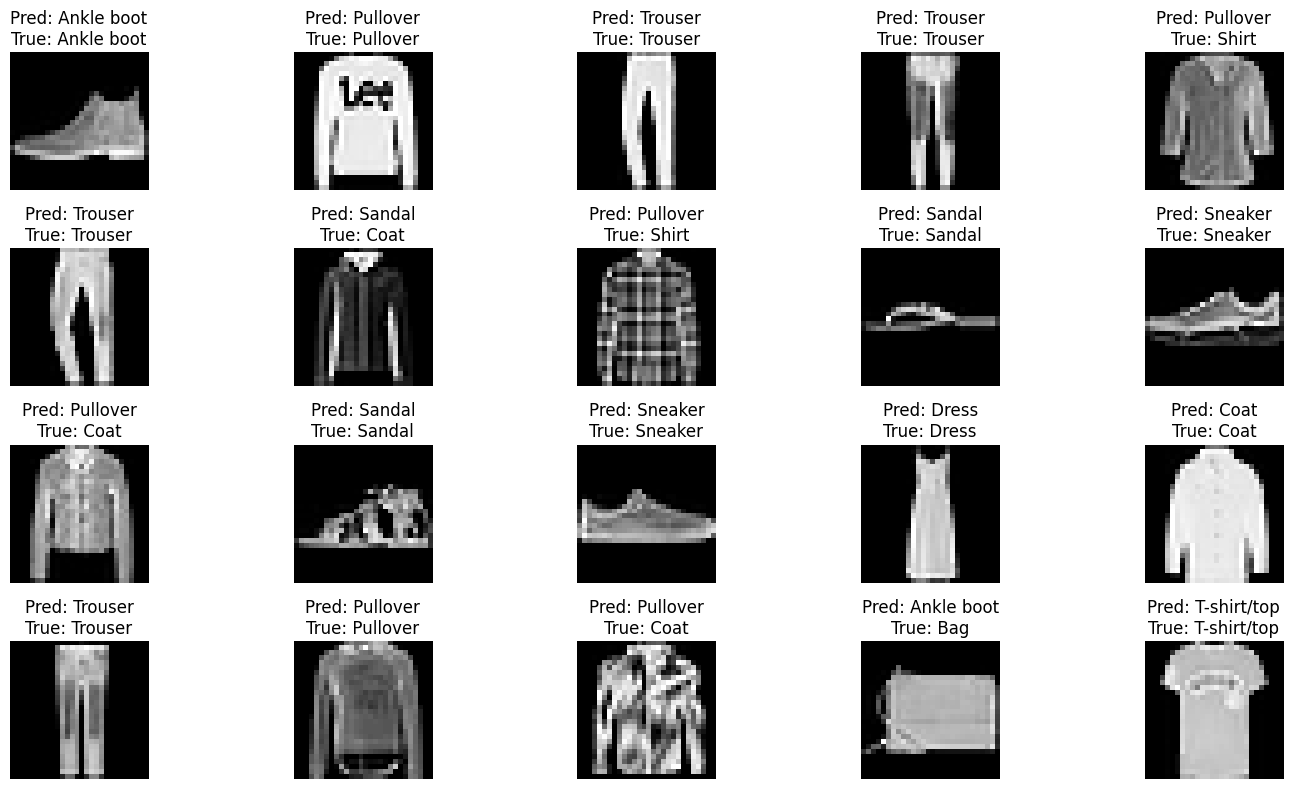

In [19]:
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_label_name = fashion_labels[y_test_pred[i]]
    # Access the true label using test_labels
    true_label_name = fashion_labels[test_labels[i]]
    plt.title(f"Pred: {pred_label_name}\nTrue: {true_label_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()